<a href="https://colab.research.google.com/github/anesmu/Aprendizaje-No-Supervisado/blob/main/Copia_de_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [95]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Generamos un grupo de puntos utilizando la funcion make_blobs:

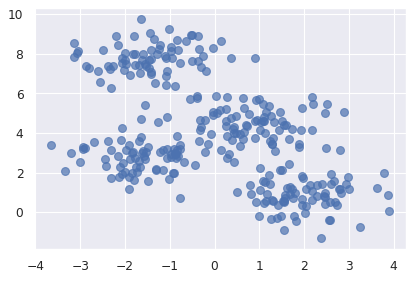

In [97]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)
 
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

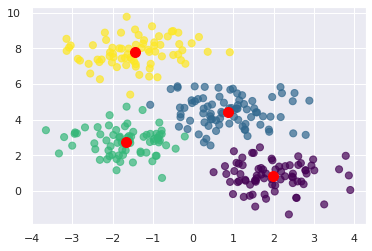

In [98]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

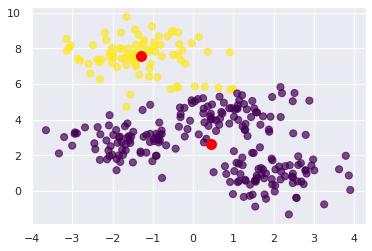

In [99]:
# 2 clusters
k_medias2 = KMeans(n_clusters=2, random_state=0)
k_medias2.fit(puntos)
idx_prediccion2 = k_medias2.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion2, s=50, alpha=0.7, cmap='viridis')
 
centroides2 = k_medias2.cluster_centers_
plt.scatter(centroides2[:, 0], centroides2[:, 1], c='red', s=100);

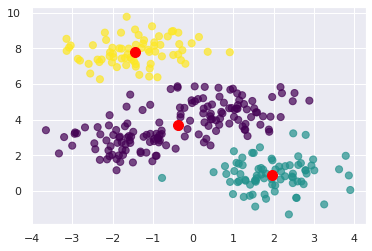

In [100]:
# 3 clusters
k_medias3 = KMeans(n_clusters=3, random_state=0)
k_medias3.fit(puntos)
idx_prediccion3 = k_medias3.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion3, s=50, alpha=0.7, cmap='viridis')
 
centroides3 = k_medias3.cluster_centers_
plt.scatter(centroides3[:, 0], centroides3[:, 1], c='red', s=100);

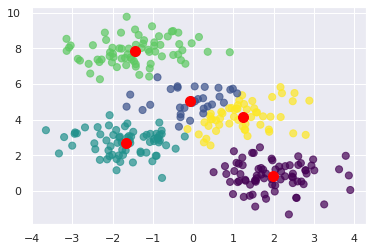

In [101]:
# 5 clusters
k_medias5 = KMeans(n_clusters=5, random_state=0)
k_medias5.fit(puntos)
idx_prediccion5 = k_medias5.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion5, s=50, alpha=0.7, cmap='viridis')
 
centroides5 = k_medias5.cluster_centers_
plt.scatter(centroides5[:, 0], centroides5[:, 1], c='red', s=100);

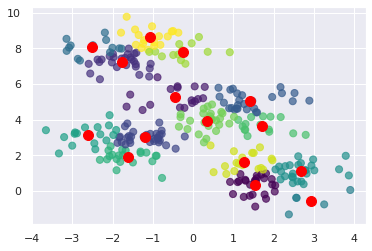

In [102]:
# 15 clusters
k_medias15 = KMeans(n_clusters=15, random_state=0)
k_medias15.fit(puntos)
idx_prediccion15 = k_medias15.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion15, s=50, alpha=0.7, cmap='viridis')
 
centroides15 = k_medias15.cluster_centers_
plt.scatter(centroides15[:, 0], centroides15[:, 1], c='red', s=100);

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

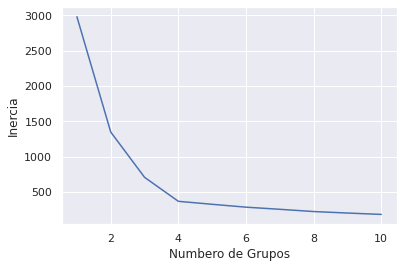

In [103]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [104]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101])

In [105]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542])

In [106]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de: 
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [107]:
import pandas as pd

archivo_clientes = '/content/drive/MyDrive/Colab Notebooks/clientes.txt'
clientes = pd.read_csv(archivo_clientes, index_col='ID:Cliente')
clientes.head()

,Genero,Edad,Salario,Clasificacion_gasto
ID:Cliente,,,,
1,Hombre,19,15,39
2,Hombre,21,15,81
3,Mujer,20,16,6
4,Mujer,23,16,77
5,Mujer,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

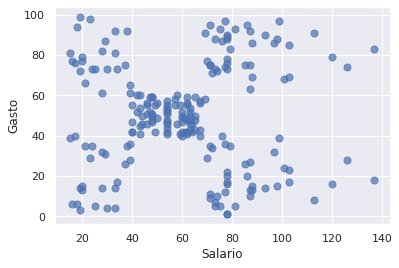

In [108]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

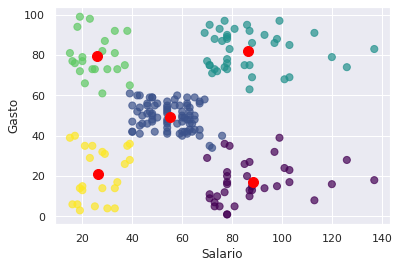

In [109]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

In [110]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

 

In [111]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-0.48861892, -0.70537255, -0.44338596, -0.65764565, -0.19273912,
       -0.23153626, -0.20577044, -0.14959482, -0.05272599])

In [112]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([-0.21675363,  0.26198659, -0.21425969,  0.46490653, -0.03879714,
        0.02576582,  0.05617562,  0.09686883])

In [113]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

5

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [114]:
objetivo = k_medias.predict(np.array([[90, 10]]))[0]
objetivo

3

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [115]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
129,Hombre,59,71,11,3
131,Hombre,47,71,9,3
135,Hombre,20,73,5,3
137,Mujer,44,73,7,3
139,Hombre,19,74,10,3
141,Mujer,57,75,5,3
145,Hombre,25,77,12,3
149,Mujer,34,78,22,3
151,Hombre,43,78,17,3


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [116]:
from sklearn.preprocessing import LabelEncoder
 
df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,0,19,15,39,1
2,0,21,15,81,4
3,1,20,16,6,7
4,1,23,16,77,4
5,1,31,17,40,1


Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [117]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

ID:Cliente
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

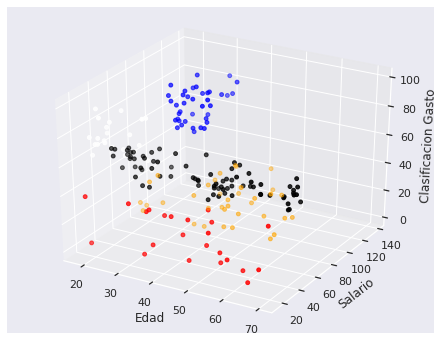

In [118]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [119]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])
 
for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()
 
    gdf = df[df['Grupo'] == i]
     
    resultados.loc[i] = ([i, edad, ingresos, gasto])
 
resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [120]:
k_medias.predict(np.array([[20, 20, 20]]))[0]

0

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes: 

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

In [121]:
archivo_casas = '/content/drive/MyDrive/Colab Notebooks/USA_Housing.csv'
casas = pd.read_csv(archivo_casas)
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [122]:
data = casas[ ['Avg. Area Income','Price'] ].values

In [123]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(data)
  inercias.append(k_medias.inertia_)
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

2

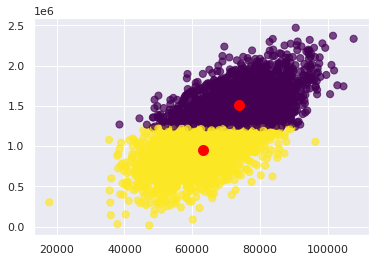

In [124]:
k_medias = KMeans(n_clusters=mejor_codo, random_state=0)
k_medias.fit(data)
idx_prediccion = k_medias.predict(data)
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

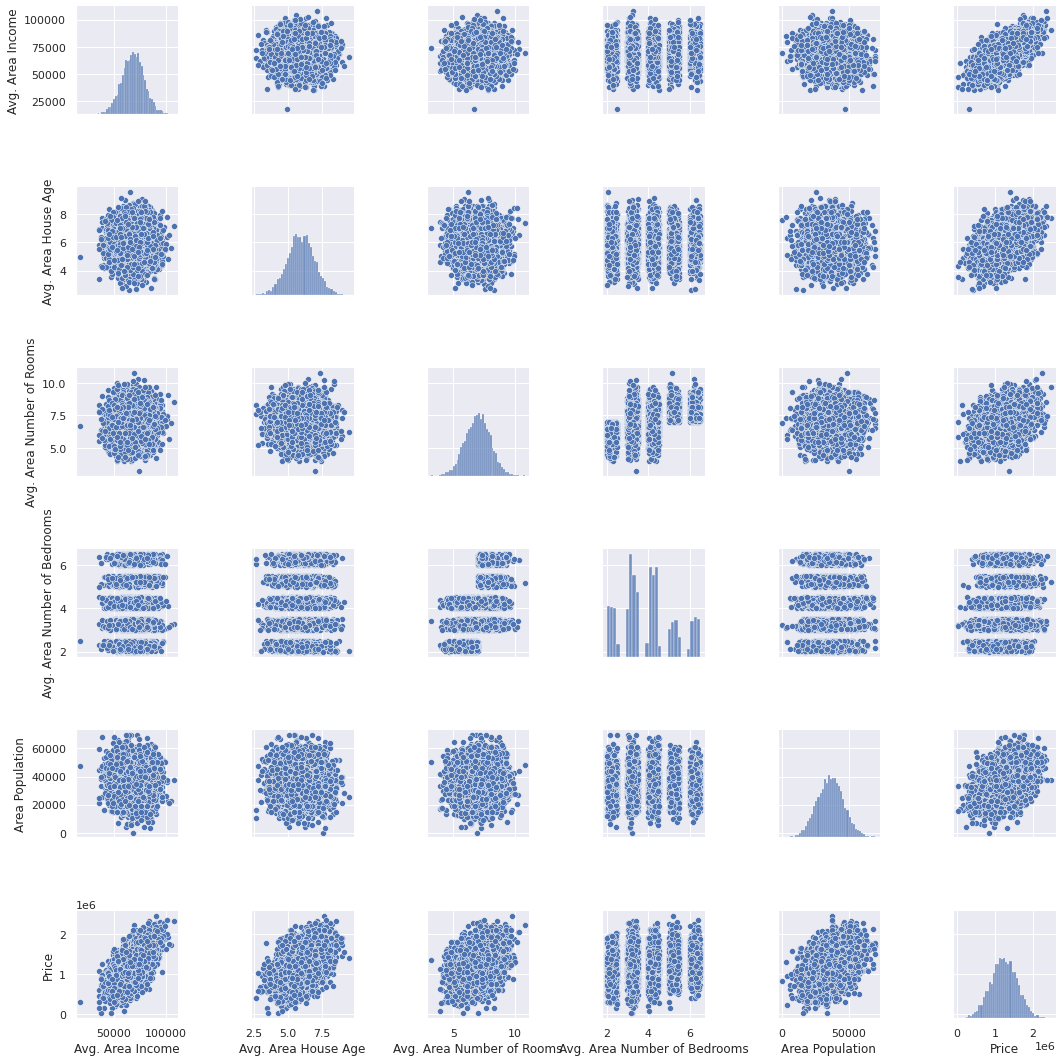

In [125]:
import seaborn as sns
sns.pairplot(casas)

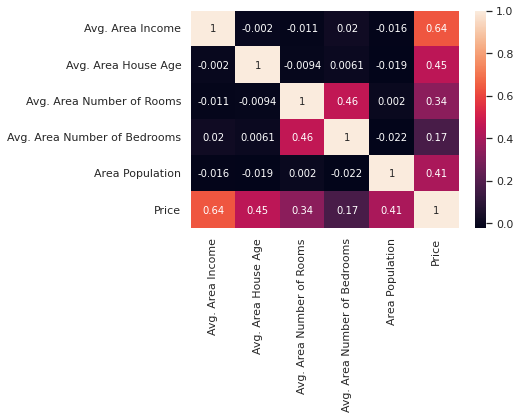

In [127]:
sns.heatmap(casas.corr(), annot=True)